In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# 
us_tract_shp = gpd.read_file('../../data/processed_data/us_tract_mainland_shp.geojson')

NameError: name 'weights' is not defined

In [10]:
# 
flow_20_march_week4_us = gpd.read_file('../../data/processed_data/flow_20_march_week4_mainland_shp.geojson')
flow_16_acs_us = gpd.read_file('../../data/processed_data/flow_16_acs_mainland_shp.geojson')


In [3]:
# 
from pysal.lib import weights
us_tract_net = weights.contiguity.Queen.from_dataframe(us_tract_shp)
us_tract_net = us_tract_net.to_networkx()


/usr/local/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
 There are 8 islands with ids: 10857, 12054, 47030, 50026, 50052, 56158, 57093, 65266.
  warnings.warn(message)


(27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
(2, 1, 3, 1, 1, 2, 5, 6, 6, 12, 24, 45, 57, 108, 206, 418, 887, 1840, 4006, 8252, 13385, 15849, 13807, 8022, 3266, 1025, 323, 8)


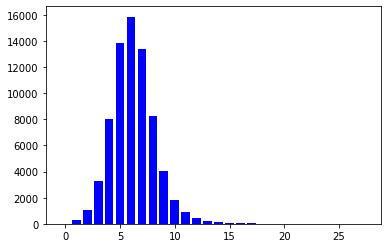

In [9]:
# check degree distributions
import collections

degree_sequence = sorted([d for n, d in us_tract_net.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width = 0.8, color='b')

print(deg)
print(cnt)


<BarContainer object of 799 artists>

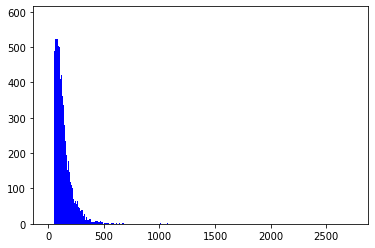

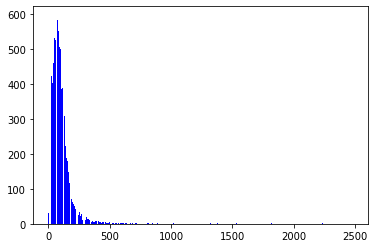

In [11]:
# usa flow degree distributions
flow_20_us_net = nx.from_pandas_edgelist(flow_20_march_week4_us, 'geoid_o', 'geoid_d', edge_attr='pop_flows')
degree_sequence = sorted([d for n, d in flow_20_us_net.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width = 0.8, color='b')

flow_16_us_net = nx.from_pandas_edgelist(flow_16_acs_us, 'Ofips', 'Dfips', edge_attr='Flow')
degree_sequence = sorted([d for n, d in flow_16_us_net.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width = 0.8, color='b')
